In [ ]:
from GetData.read_data import get_stock_data

In [4]:
Apple = get_stock_data()
print(type(Apple))

<class 'pandas.core.frame.DataFrame'>


In [30]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [31]:
print(Apple.head())

              Open      High     Low   Close      Volume  Ex-Dividend  \
Date                                                                    
2017-01-03  115.80  116.3300  114.76  116.15  28781865.0          0.0   
2017-01-04  115.85  116.5100  115.75  116.02  21118116.0          0.0   
2017-01-05  115.92  116.8642  115.81  116.61  22193587.0          0.0   
2017-01-06  116.78  118.1600  116.47  117.91  31751900.0          0.0   
2017-01-09  117.95  119.4300  117.94  118.99  33561948.0          0.0   

            Split Ratio   Adj. Open   Adj. High    Adj. Low  Adj. Close  \
Date                                                                      
2017-01-03          1.0  114.369701  114.893155  113.342546  114.715378   
2017-01-04          1.0  114.419083  115.070931  114.320318  114.586983   
2017-01-05          1.0  114.488219  115.420756  114.379577  115.169696   
2017-01-06          1.0  115.337596  116.700551  115.031425  116.453639   
2017-01-09          1.0  116.493145  1

In [32]:
Apple.Open.describe()

count    308.000000
mean     154.561875
std       16.084998
min      115.800000
25%      143.717500
50%      155.105000
75%      169.955000
max      182.590000
Name: Open, dtype: float64

In [1]:
fit = np.polyfit(pd.to_numeric(Apple.index),Apple.Open, deg=25)

NameError: name 'np' is not defined

In [34]:
y = np.polyval(fit, pd.to_numeric(Apple.index))

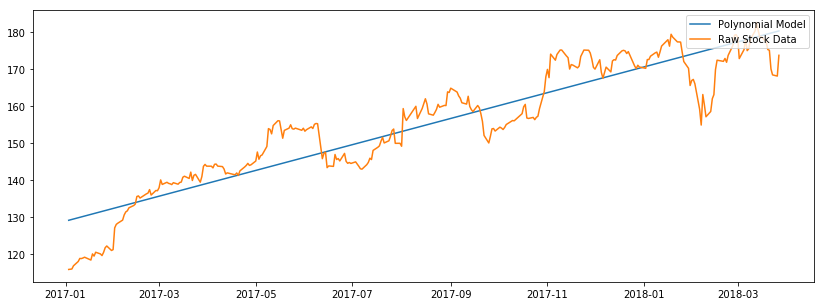

In [37]:
plt.figure(0, figsize=(14, 5))
plt.plot(Apple.index, y, label='Polynomial Model')
plt.plot(Apple.index, Apple.Open, label='Raw Stock Data')
plt.legend(loc=1)
plt.show()

C:\Users\zarie\Anaconda3\envs\TPM-Financial-Analysis\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\zarie\Anaconda3\envs\TPM-Financial-Analysis\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\zarie\Anaconda3\envs\TPM-Financial-Analysis\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\zarie\Anaconda3\envs\TPM-Financial-Analysis\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\zarie\Anaconda3\envs\TPM-Financial-Analysis\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\zarie\Anaconda3\envs\TPM-Financial-Analysis\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\zarie\Anaconda3\envs\TPM-Financial-Analysis\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be 

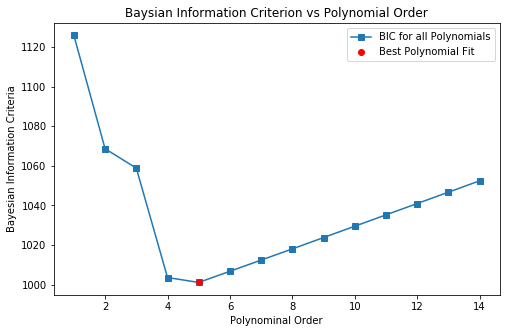

In [49]:
orders = np.arange(1, 15)
SS_list = np.zeros(len(orders))
n = len(pd.to_numeric(Apple.index))

for i in range(len(orders)):
    y_hat = np.polyval(np.polyfit(pd.to_numeric(Apple.index), Apple.Open, orders[i]), pd.to_numeric(Apple.index))
    SS_list[i] = np.sum((y_hat - Apple.Open)**2)/n

# Bayesian Information Criteria (BIC).
BIC = n*np.log(SS_list) + orders*np.log(n) 

best_poly = np.min(BIC)
best_p_index = np.argmin(BIC)

plt.figure(10, figsize=(8, 5))
plt.title('Baysian Information Criterion vs Polynomial Order')
plt.ylabel('Bayesian Information Criteria'), plt.xlabel('Polynominal Order')
plt.plot(orders, BIC,'s-', label='BIC for all Polynomials')
plt.plot(orders[best_p_index], best_poly, 'ro', label='Best Polynomial Fit')
plt.legend(loc=1)
plt.show()